In [1]:
# your code here
from bs4 import BeautifulSoup
import requests
import csv
from datetime import datetime

In [2]:
HEADERS = {"User-Agent" : "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Mobile Safari/537.36"}

##url = "https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160&dynamic=false"
#req = requests.get(url, headers = HEADERS)

#soup = BeautifulSoup(req.text,'html.parser')

In [49]:
all_list = soup.find("ul",{"class":"jobsearch-ResultsList css-0"})

urls =[]
for elt in all_list:
    a = elt.find_all('a',{"id":lambda x: x and x.startswith('job_')})
    for t in a:
        a_tag = t['href']
        urls.append(a_tag)
urls

['/rc/clk?jk=c372d2731c9968ee&fccid=5dc959944195edbd&vjs=3',
 '/rc/clk?jk=4704e281e4b02dfd&fccid=b924e7576c96517c&vjs=3',
 '/rc/clk?jk=93ed626072d15153&fccid=9917de3c28f569f6&vjs=3',
 '/rc/clk?jk=09d8b2ce8445ea14&fccid=1544766d4c2915b0&vjs=3',
 '/rc/clk?jk=2daee8c97e51a665&fccid=a3ed87e8a7024a0c&vjs=3',
 '/rc/clk?jk=ae349e1f44ddebd1&fccid=2113a18556757eb3&vjs=3',
 '/rc/clk?jk=eced1939801a2a4a&fccid=aa911c692ae97e52&vjs=3',
 '/rc/clk?jk=5d83c1115bd70bf4&fccid=befa15329179c1cd&vjs=3',
 '/rc/clk?jk=34b6209861063fb6&fccid=9afd1d33e28012b5&vjs=3',
 '/rc/clk?jk=9cf1555bc3f64447&fccid=d9805af20a6c196e&vjs=3',
 '/rc/clk?jk=fee8d67c38e064e9&fccid=b951b3c84f2f4408&vjs=3',
 '/rc/clk?jk=3fdd2501d31db30d&fccid=5123bb047cfca526&vjs=3',
 '/rc/clk?jk=c3366dd503a4df59&fccid=5da986b6e802475f&vjs=3',
 '/rc/clk?jk=1c875a01c0e325c1&fccid=074c08224d41e7fb&vjs=3',
 '/rc/clk?jk=cd76a423f3513db9&fccid=27513a64c5966d2e&vjs=3']

In [106]:
salary_text = []
for elt in all_list:
    salary = elt.find_all('div',{"class":"metadata salary-snippet-container"})
    if len(salary)==0:
        salary_text.append('None')
        
    else:
        for s in salary:
            salary_text.append(t.text)
salary_text

['None',
 'None',
 'None',
 '$95,588 - $101,109 a year',
 '$95,588 - $101,109 a year',
 'None',
 'None',
 'None',
 'None',
 '$95,588 - $101,109 a year',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None']

In [153]:
job_title = []
Company =[]
Location = []
Job_desc = []
root = "https://www.indeed.com"
for url in urls:
    website = f'{root}/{url}'   
    website = "https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url="+website

    req = requests.get(website,headers=HEADERS)
    soup = BeautifulSoup(req.text,'html.parser')
    
    title = soup.find('h1')
    job_title.append(title.text if title else 'N/A')
    
    company = soup.find('div',{"data-testid":"inlineHeader-companyName"})
    Company.append(company.text if company else 'N/A')
    
    location = soup.find('div',{"data-testid":"inlineHeader-companyLocation"})
    Location.append(location.text if location else 'N/A')
    
    desc = soup.find('div',{"id":"jobDescriptionText"})
    description = desc.find_all('p') if desc else []
    if len(description) > 1:
        des =""
        for txt in description:
            des = des + txt.text
        Job_desc.append(des)
    else:
        description = desc.find('p') if desc else []
        Job_desc.append(description.text if description else 'N/A')
       

In [165]:
header = ['Job title','Company','Location', 'Salary', 'Description']


dict_job = []

for i in range(len(job_title)):
    job = {
        "Job title": job_title[i],
        "Company": Company[i],
        "Location": Location[i],
        "Salary": salary_text[i],
        "Description": Job_desc[i]
    }
    dict_job.append(job)

with open('jobs_data_analyst.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=header)
    writer.writeheader()
    writer.writerows(dict_job)

In [4]:
page_ref = ""
num = 0
url =f'https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160'

In [5]:
web_pages = []

for num in range(0, 110, 10):
    if num == 0:
        page_ref = ""
    else:
        page_ref = f'&start={num}'
    
    website = f'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url={url}{page_ref}'
    web_pages.append(website)

web_pages


['https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160',
 'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160&start=10',
 'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160&start=20',
 'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160&start=30',
 'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&from=searchOnHP&vjk=1ffb7092c060c160&start=40',
 'https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url=https://au.indeed.com/jobs?q=data+analyst&l=Australia&f

In [6]:
salary_text = []
job_title = []
Company =[]
Location = []
Job_desc = []

for link in web_pages:
    req = requests.get(link, headers = HEADERS)

    soup = BeautifulSoup(req.text,'html.parser')

    all_list = soup.find("ul",{"class":"jobsearch-ResultsList css-0"})

    urls =[]
    for elt in all_list:
        a = elt.find_all('a',{"id":lambda x: x and x.startswith('job_')})
        for t in a:
            a_tag = t['href']
            urls.append(a_tag)

    
    for elt in all_list:
        salary = elt.find_all('div',{"class":"metadata salary-snippet-container"})
        if len(salary)==0:
            salary_text.append('None')

        else:
            for s in salary:
                salary_text.append(t.text)

    root = "https://www.indeed.com"
    for url in urls:
        website = f'{root}/{url}'   
        website = "https://api.scrapingdog.com/scrape?api_key=64a75ff5377778182af3780e&url="+website

        req = requests.get(website,headers=HEADERS)
        soup = BeautifulSoup(req.text,'html.parser')

        title = soup.find('h1')
        job_title.append(title.text if title else 'N/A')

        company = soup.find('div',{"data-testid":"inlineHeader-companyName"})
        Company.append(company.text if company else 'N/A')

        location = soup.find('div',{"data-testid":"inlineHeader-companyLocation"})
        Location.append(location.text if location else 'N/A')

        desc = soup.find('div',{"id":"jobDescriptionText"})
        description = desc.find_all('p') if desc else []
        if len(description) > 1:
            des =""
            for txt in description:
                des = des + txt.text
            Job_desc.append(des)
        else:
            description = desc.find('p') if desc else []
            Job_desc.append(description.text if description else 'N/A')

In [8]:
header = ['Job title','Company','Location', 'Salary', 'Description']


dict_job = []

for i in range(len(job_title)):
    job = {
        "Job title": job_title[i],
        "Company": Company[i],
        "Location": Location[i],
        "Salary": salary_text[i],
        "Description": Job_desc[i]
    }
    dict_job.append(job)

with open('jobs_data_analyst.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.DictWriter(f, fieldnames=header)
    writer.writeheader()
    writer.writerows(dict_job)

In [2]:
import pandas as pd
df_job = pd.read_csv("jobs_data_analyst.csv", na_values="?")
df_job

,Job title,Company,Location,Salary,Description
0,Data Analyst - Emergency Department,The Royal Melbourne Hospital,Melbourne VIC,None,NaN
1,Data Analyst,ING,Sydney NSW,None,"ING, Australia’s most recommended bank is on t..."
2,NaN,NaN,NaN,Data Analyst,NaN
3,Data Analyst,Careerlink People Solutions,Australia,None,Our client located in the Adelaide CBD is see...
4,Data Analyst,The Good Guys,Victoria,None,Job no: 507151 Work type: Permanent Full Time...
...,...,...,...,...,...
160,Intelligence Analyst 24/7 - TS/SCI with Poly,Leidos,Alice Springs NT,Senior Data Analyst/Biostatistician,Description This position is a 24/7 crew posit...
161,Establishment Management and Data Analysis Off...,Queensland Health,Rockhampton QLD,None,NaN
162,Senior Data Scientist/Data Analyst,Department of Employment and Workplace Relations,Canberra ACT,Business Analyst | 12-month contract,About the Department of Employment and Workpla...
163,Integration Business Analyst | 12+ month contract,Hudson Australia,Brisbane QLD,None,"Our client, a large complex Queensland Governm..."


In [3]:
df_job.head(10)

,Job title,Company,Location,Salary,Description
0,Data Analyst - Emergency Department,The Royal Melbourne Hospital,Melbourne VIC,None,NaN
1,Data Analyst,ING,Sydney NSW,None,"ING, Australia’s most recommended bank is on t..."
2,NaN,NaN,NaN,Data Analyst,NaN
3,Data Analyst,Careerlink People Solutions,Australia,None,Our client located in the Adelaide CBD is see...
4,Data Analyst,The Good Guys,Victoria,None,Job no: 507151 Work type: Permanent Full Time...
5,Flight Data Analyst,Virgin Australia,Brisbane QLD,None,Full TimeBrisbaneFlight OperationsHello. We’re...
6,NaN,NaN,NaN,None,NaN
7,Principal Data Analyst,Queensland Health,"33 Charlotte Street, Brisbane QLD 4000",Data Analyst,NaN
8,Data Analytics & Intelligence Analyst,"NSW Government -Department of Enterprise, Inve...",Sydney NSW,None,Data Analytics & Intelligence Analyst · Make a...
9,Data Analyst,Ramsay Health Care,"126 Phillip Street, Sydney NSW 2000",Data Analyst,"Entrepreneurial, optimistic and energetic, Ram..."


In [4]:
df_job.isnull().any(axis=0)

Job title       True
Company         True
Location        True
Salary         False
Description     True
dtype: bool

In [5]:
df_job['Job title'].isnull().any()

True

In [6]:
df_job.dropna(subset = ['Job title'], inplace=True)

In [7]:
df_job

,Job title,Company,Location,Salary,Description
0,Data Analyst - Emergency Department,The Royal Melbourne Hospital,Melbourne VIC,None,NaN
1,Data Analyst,ING,Sydney NSW,None,"ING, Australia’s most recommended bank is on t..."
3,Data Analyst,Careerlink People Solutions,Australia,None,Our client located in the Adelaide CBD is see...
4,Data Analyst,The Good Guys,Victoria,None,Job no: 507151 Work type: Permanent Full Time...
5,Flight Data Analyst,Virgin Australia,Brisbane QLD,None,Full TimeBrisbaneFlight OperationsHello. We’re...
...,...,...,...,...,...
160,Intelligence Analyst 24/7 - TS/SCI with Poly,Leidos,Alice Springs NT,Senior Data Analyst/Biostatistician,Description This position is a 24/7 crew posit...
161,Establishment Management and Data Analysis Off...,Queensland Health,Rockhampton QLD,None,NaN
162,Senior Data Scientist/Data Analyst,Department of Employment and Workplace Relations,Canberra ACT,Business Analyst | 12-month contract,About the Department of Employment and Workpla...
163,Integration Business Analyst | 12+ month contract,Hudson Australia,Brisbane QLD,None,"Our client, a large complex Queensland Governm..."


In [8]:
df_job['Job title'].isnull().any()

False

In [9]:
df_job['Description'].isnull().any()

True

In [10]:
df_job.dropna(subset = ['Description'], inplace=True)

In [11]:
df_job

,Job title,Company,Location,Salary,Description
1,Data Analyst,ING,Sydney NSW,None,"ING, Australia’s most recommended bank is on t..."
3,Data Analyst,Careerlink People Solutions,Australia,None,Our client located in the Adelaide CBD is see...
4,Data Analyst,The Good Guys,Victoria,None,Job no: 507151 Work type: Permanent Full Time...
5,Flight Data Analyst,Virgin Australia,Brisbane QLD,None,Full TimeBrisbaneFlight OperationsHello. We’re...
8,Data Analytics & Intelligence Analyst,"NSW Government -Department of Enterprise, Inve...",Sydney NSW,None,Data Analytics & Intelligence Analyst · Make a...
...,...,...,...,...,...
158,Data Analyst - Customer Engagement Insights,Johnson & Johnson,Sydney NSW,Senior Data Analyst/Biostatistician,We are Janssen. Our mission drives us. Our pat...
160,Intelligence Analyst 24/7 - TS/SCI with Poly,Leidos,Alice Springs NT,Senior Data Analyst/Biostatistician,Description This position is a 24/7 crew posit...
162,Senior Data Scientist/Data Analyst,Department of Employment and Workplace Relations,Canberra ACT,Business Analyst | 12-month contract,About the Department of Employment and Workpla...
163,Integration Business Analyst | 12+ month contract,Hudson Australia,Brisbane QLD,None,"Our client, a large complex Queensland Governm..."


In [12]:
df_job.drop_duplicates(keep='first', inplace=True)

In [13]:
df_job = df_job[['Job title','Company','Location','Description']]

In [14]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 1 to 164
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Job title    103 non-null    object
 1   Company      103 non-null    object
 2   Location     99 non-null     object
 3   Description  103 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


In [15]:
df_job.dtypes

Job title      object
Company        object
Location       object
Description    object
dtype: object

In [16]:
df_job =df_job.reset_index(drop=True)

In [17]:
df_job

,Job title,Company,Location,Description
0,Data Analyst,ING,Sydney NSW,"ING, Australia’s most recommended bank is on t..."
1,Data Analyst,Careerlink People Solutions,Australia,Our client located in the Adelaide CBD is see...
2,Data Analyst,The Good Guys,Victoria,Job no: 507151 Work type: Permanent Full Time...
3,Flight Data Analyst,Virgin Australia,Brisbane QLD,Full TimeBrisbaneFlight OperationsHello. We’re...
4,Data Analytics & Intelligence Analyst,"NSW Government -Department of Enterprise, Inve...",Sydney NSW,Data Analytics & Intelligence Analyst · Make a...
...,...,...,...,...
98,Data Analyst - Customer Engagement Insights,Johnson & Johnson,Sydney NSW,We are Janssen. Our mission drives us. Our pat...
99,Intelligence Analyst 24/7 - TS/SCI with Poly,Leidos,Alice Springs NT,Description This position is a 24/7 crew posit...
100,Senior Data Scientist/Data Analyst,Department of Employment and Workplace Relations,Canberra ACT,About the Department of Employment and Workpla...
101,Integration Business Analyst | 12+ month contract,Hudson Australia,Brisbane QLD,"Our client, a large complex Queensland Governm..."


In [18]:
text = str(df_job["Description"][0])
lower_text = text.lower()
lower_text

'ing, australia’s most recommended bank is on the hunt for an experienced "data analysts" to join our high performing customer insights team. you’ll be responsible for producing comprehensive deep-dive analyses, and delivering these actionable insights to key stakeholders using impactful visualisation and presentation techniques. our ideal candidate will be passionate about data, and its ability to strengthen narrative. this love of data and an understanding of how customers tick are essential in this role. you’ll be instrumental across all stages of analysis, including, but not limited to, planning, forecasting, behavioural investigation, research integration, and across all stages of the customer lifecycle and value management. you’ll be an integral part of our customer insights team, which is the coe for the analytics function, for our retail bank. the ci team is also a strategic partner for the business, equipping our stakeholders with data and insights to help identify, assess and

In [117]:
pip install --user -U nltk

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nltk in c:\users\shevindi\anaconda3\lib\site-packages (3.7)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shevindi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize
token_text = word_tokenize(lower_text)
token_text

['ing',
 ',',
 'australia',
 '’',
 's',
 'most',
 'recommended',
 'bank',
 'is',
 'on',
 'the',
 'hunt',
 'for',
 'an',
 'experienced',
 '``',
 'data',
 'analysts',
 "''",
 'to',
 'join',
 'our',
 'high',
 'performing',
 'customer',
 'insights',
 'team',
 '.',
 'you',
 '’',
 'll',
 'be',
 'responsible',
 'for',
 'producing',
 'comprehensive',
 'deep-dive',
 'analyses',
 ',',
 'and',
 'delivering',
 'these',
 'actionable',
 'insights',
 'to',
 'key',
 'stakeholders',
 'using',
 'impactful',
 'visualisation',
 'and',
 'presentation',
 'techniques',
 '.',
 'our',
 'ideal',
 'candidate',
 'will',
 'be',
 'passionate',
 'about',
 'data',
 ',',
 'and',
 'its',
 'ability',
 'to',
 'strengthen',
 'narrative',
 '.',
 'this',
 'love',
 'of',
 'data',
 'and',
 'an',
 'understanding',
 'of',
 'how',
 'customers',
 'tick',
 'are',
 'essential',
 'in',
 'this',
 'role',
 '.',
 'you',
 '’',
 'll',
 'be',
 'instrumental',
 'across',
 'all',
 'stages',
 'of',
 'analysis',
 ',',
 'including',
 ',',
 'bu

In [21]:
import string
punctuation_list_new = list(string.punctuation)
manual_list_of_punctuation = ['’','``','""','_']
for x in manual_list_of_punctuation:
    punctuation_list_new.append(x)

In [22]:
no_punct_txt = []
for elt in token_text:
    if elt not in punctuation_list_new:
        no_punct_txt.append(elt)
no_punct_txt

['ing',
 'australia',
 's',
 'most',
 'recommended',
 'bank',
 'is',
 'on',
 'the',
 'hunt',
 'for',
 'an',
 'experienced',
 'data',
 'analysts',
 "''",
 'to',
 'join',
 'our',
 'high',
 'performing',
 'customer',
 'insights',
 'team',
 'you',
 'll',
 'be',
 'responsible',
 'for',
 'producing',
 'comprehensive',
 'deep-dive',
 'analyses',
 'and',
 'delivering',
 'these',
 'actionable',
 'insights',
 'to',
 'key',
 'stakeholders',
 'using',
 'impactful',
 'visualisation',
 'and',
 'presentation',
 'techniques',
 'our',
 'ideal',
 'candidate',
 'will',
 'be',
 'passionate',
 'about',
 'data',
 'and',
 'its',
 'ability',
 'to',
 'strengthen',
 'narrative',
 'this',
 'love',
 'of',
 'data',
 'and',
 'an',
 'understanding',
 'of',
 'how',
 'customers',
 'tick',
 'are',
 'essential',
 'in',
 'this',
 'role',
 'you',
 'll',
 'be',
 'instrumental',
 'across',
 'all',
 'stages',
 'of',
 'analysis',
 'including',
 'but',
 'not',
 'limited',
 'to',
 'planning',
 'forecasting',
 'behavioural',
 'i

In [23]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

filtered_list = []
for elt in no_punct_txt:
    if elt not in stop_words:
        filtered_list.append(elt)
filtered_list

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shevindi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['ing',
 'australia',
 'recommended',
 'bank',
 'hunt',
 'experienced',
 'data',
 'analysts',
 "''",
 'join',
 'high',
 'performing',
 'customer',
 'insights',
 'team',
 'responsible',
 'producing',
 'comprehensive',
 'deep-dive',
 'analyses',
 'delivering',
 'actionable',
 'insights',
 'key',
 'stakeholders',
 'using',
 'impactful',
 'visualisation',
 'presentation',
 'techniques',
 'ideal',
 'candidate',
 'passionate',
 'data',
 'ability',
 'strengthen',
 'narrative',
 'love',
 'data',
 'understanding',
 'customers',
 'tick',
 'essential',
 'role',
 'instrumental',
 'across',
 'stages',
 'analysis',
 'including',
 'limited',
 'planning',
 'forecasting',
 'behavioural',
 'investigation',
 'research',
 'integration',
 'across',
 'stages',
 'customer',
 'lifecycle',
 'value',
 'management',
 'integral',
 'part',
 'customer',
 'insights',
 'team',
 'coe',
 'analytics',
 'function',
 'retail',
 'bank',
 'ci',
 'team',
 'also',
 'strategic',
 'partner',
 'business',
 'equipping',
 'stakeho

In [31]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

lemmatize_list = [lemmatizer.lemmatize(w)for w in filtered_list]
lemmatize_list


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shevindi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['ing',
 'australia',
 'recommended',
 'bank',
 'hunt',
 'experienced',
 'data',
 'analyst',
 "''",
 'join',
 'high',
 'performing',
 'customer',
 'insight',
 'team',
 'responsible',
 'producing',
 'comprehensive',
 'deep-dive',
 'analysis',
 'delivering',
 'actionable',
 'insight',
 'key',
 'stakeholder',
 'using',
 'impactful',
 'visualisation',
 'presentation',
 'technique',
 'ideal',
 'candidate',
 'passionate',
 'data',
 'ability',
 'strengthen',
 'narrative',
 'love',
 'data',
 'understanding',
 'customer',
 'tick',
 'essential',
 'role',
 'instrumental',
 'across',
 'stage',
 'analysis',
 'including',
 'limited',
 'planning',
 'forecasting',
 'behavioural',
 'investigation',
 'research',
 'integration',
 'across',
 'stage',
 'customer',
 'lifecycle',
 'value',
 'management',
 'integral',
 'part',
 'customer',
 'insight',
 'team',
 'coe',
 'analytics',
 'function',
 'retail',
 'bank',
 'ci',
 'team',
 'also',
 'strategic',
 'partner',
 'business',
 'equipping',
 'stakeholder',
 '

In [32]:
len(lemmatize_list)

205

In [33]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

stemmed_list = [ps.stem(w) for w in lemmatize_list]
stemmed_list

['ing',
 'australia',
 'recommend',
 'bank',
 'hunt',
 'experienc',
 'data',
 'analyst',
 "''",
 'join',
 'high',
 'perform',
 'custom',
 'insight',
 'team',
 'respons',
 'produc',
 'comprehens',
 'deep-div',
 'analysi',
 'deliv',
 'action',
 'insight',
 'key',
 'stakehold',
 'use',
 'impact',
 'visualis',
 'present',
 'techniqu',
 'ideal',
 'candid',
 'passion',
 'data',
 'abil',
 'strengthen',
 'narr',
 'love',
 'data',
 'understand',
 'custom',
 'tick',
 'essenti',
 'role',
 'instrument',
 'across',
 'stage',
 'analysi',
 'includ',
 'limit',
 'plan',
 'forecast',
 'behaviour',
 'investig',
 'research',
 'integr',
 'across',
 'stage',
 'custom',
 'lifecycl',
 'valu',
 'manag',
 'integr',
 'part',
 'custom',
 'insight',
 'team',
 'coe',
 'analyt',
 'function',
 'retail',
 'bank',
 'ci',
 'team',
 'also',
 'strateg',
 'partner',
 'busi',
 'equip',
 'stakehold',
 'data',
 'insight',
 'help',
 'identifi',
 'ass',
 'quantifi',
 'opportun',
 'outcom',
 'drive',
 'decis',
 'well',
 'underst

In [61]:
from collections import Counter
from nltk import ngrams
import matplotlib.pyplot as plt

# Count the frequency of each word using Counter
word_frq = Counter(stemmed_list)
#for word, freq in word_frq.items():
   # print(f"{word}: {freq}")

paired_freq = Counter(ngrams(stemmed_list,2))
trigram = Counter(ngrams(stemmed_list,3))


In [63]:
word_freq = pd.DataFrame(word_frq.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_pairs =pd.DataFrame(paired_freq.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)

trigrams =pd.DataFrame(trigram.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)



<AxesSubplot:xlabel='frequency', ylabel='trigrams'>

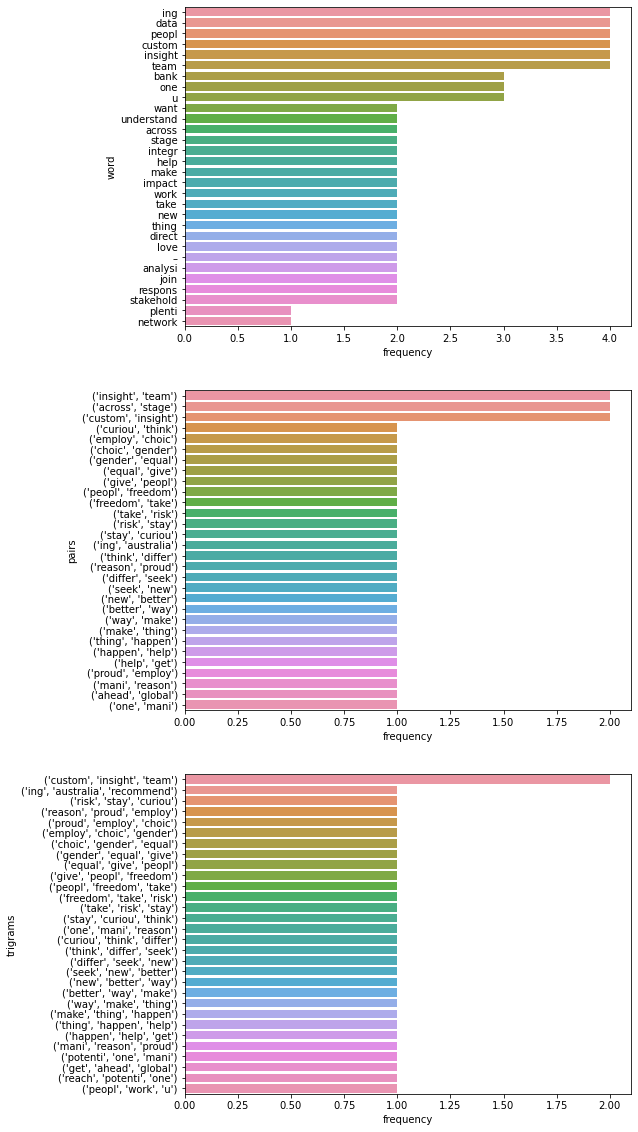

In [64]:
import seaborn as sns

fig, axes = plt.subplots(3,1,figsize=(8,20))
sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))

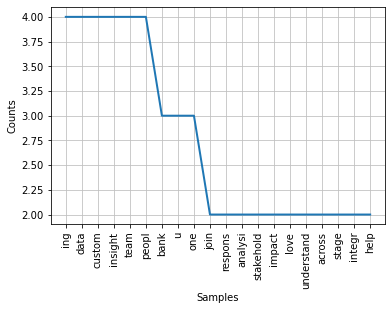

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [55]:
freq = nltk.FreqDist(stemmed_list)
freq.plot(20)

In [41]:
job_urls =[]
for url in urls:
    job_urls.append(url.find('a')['href'])
    
job_urls

AttributeError: ResultSet object has no attribute 'find'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?